In [1]:
import numpy as np
from pathlib import Path
from PIL import Image

from rpca import RobustPCA
import matplotlib.pyplot as plt

dataset : http://www.svcl.ucsd.edu/projects/background_subtraction/ucsdbgsub_dataset.htm

In [2]:
dataset = 'peds'
data_dir = Path.cwd() / 'data' / dataset
data_files = sorted(data_dir.glob('*'))

In [3]:
img_array = []
img_shape = np.array(Image.open(data_files[0])).shape

for f in data_files:
    img_array.append(np.array(Image.open(f)).flatten())
img_array = np.array(img_array).astype(float).T
img_array.shape

(35264, 170)

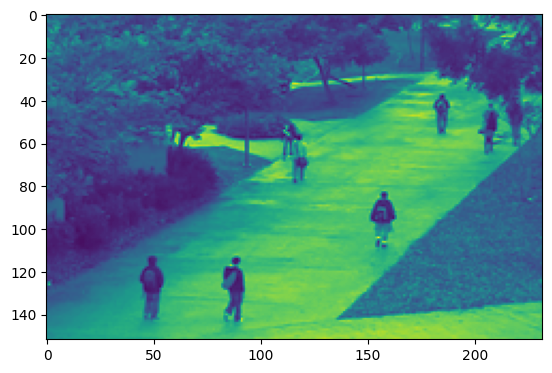

In [4]:
plt.imshow(img_array[:, 0].reshape(img_shape))

In [5]:
rpca = RobustPCA(n_components=2)
rpca.fit(img_array)

[1] Tolerance: 1e-05	Current error: 0.11795018750741908
[2] Tolerance: 1e-05	Current error: 0.11697522972935702
[3] Tolerance: 1e-05	Current error: 0.11623048585184015
[4] Tolerance: 1e-05	Current error: 0.07087910290715188
[5] Tolerance: 1e-05	Current error: 0.039103168682851526
[6] Tolerance: 1e-05	Current error: 0.02364147530896724
[7] Tolerance: 1e-05	Current error: 0.017263977412388373
[8] Tolerance: 1e-05	Current error: 0.013802095427419817
[9] Tolerance: 1e-05	Current error: 0.009861853519536248
[10] Tolerance: 1e-05	Current error: 0.004899377260109271
[11] Tolerance: 1e-05	Current error: 0.001868188029754443
[12] Tolerance: 1e-05	Current error: 0.0006853682324081771
[13] Tolerance: 1e-05	Current error: 0.00026134929437396137
[14] Tolerance: 1e-05	Current error: 9.654037022979129e-05
[15] Tolerance: 1e-05	Current error: 3.4707841571441303e-05
[16] Tolerance: 1e-05	Current error: 1.2385118526561154e-05
[17] Tolerance: 1e-05	Current error: 4.405158067628172e-06
Tolerance condition

Text(0.5, 1.0, 'background')

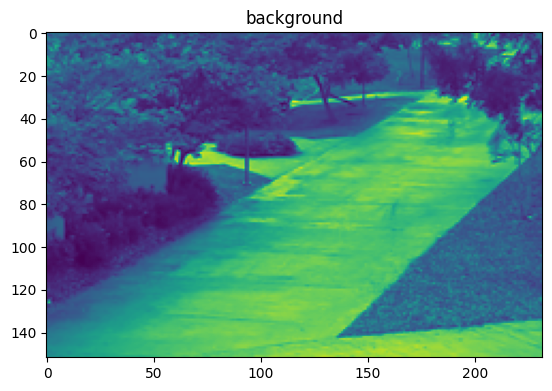

In [6]:
plt.imshow(rpca.low_rank_[:, 0].reshape(img_shape))
plt.title('background')

Text(0.5, 1.0, 'foreground')

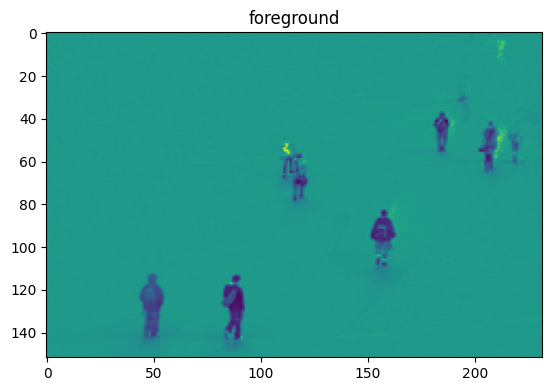

In [7]:
plt.imshow(rpca.sparse_[:, 0].reshape(img_shape))
plt.title('foreground')